<a href="https://colab.research.google.com/github/jajoonaman/ML_DL_Work/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge Regression

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When
multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from
the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.
It is hoped that the net effect will be to give estimates that are more reliable.

### Importing Certain important libraries


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Uploading our dataset to GoogleDrive

In [ ]:
import io

from google.colab import files
upload1 = files.upload()

Saving Hitters.xlsx to Hitters (1).xlsx


#### Reading our dataset in the form of DataFrame

In [ ]:
data = pd.read_excel("Hitters.xlsx")
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


#### Getting into the information and description of the DataSet.

In [ ]:
print("Information:",data.info())
print("\nDescription:",data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

#### Finding out null/missing values in our dataset.

In [ ]:
# Seeing Missing values in data

# Total no. of values that are lost in the features
total = data.isnull().sum().sort_values(ascending=False)

# Percent of values that are lost
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

# Observing the total missing values with there Percentage
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

           Total  Percent
Salary        59  0.18323
NewLeague      0  0.00000
Hits           0  0.00000
HmRun          0  0.00000
Runs           0  0.00000
RBI            0  0.00000
Walks          0  0.00000
Years          0  0.00000
CAtBat         0  0.00000
CHits          0  0.00000
CHmRun         0  0.00000
CRuns          0  0.00000
CRBI           0  0.00000
CWalks         0  0.00000
League         0  0.00000
Division       0  0.00000
PutOuts        0  0.00000
Assists        0  0.00000
Errors         0  0.00000
AtBat          0  0.00000


### Creating train and test datasets for implementation.


As from above we can observe that there are 59 missing values in our "Salary" coloumn of dataset.

So, we extract the columns which has Salary marked as nan and make it as our test dataset and the remaining with Salary coloumn that does not have nan values we make it as train dataset.

In [ ]:
train = data[data['Salary'].notna()]
print(train.head())

test = data[data['Salary'].isnull()]
print(test.head())

   AtBat  Hits  HmRun  Runs  RBI  ...  PutOuts  Assists  Errors  Salary  NewLeague
1    315    81      7    24   38  ...      632       43      10   475.0          N
2    479   130     18    66   72  ...      880       82      14   480.0          A
3    496   141     20    65   78  ...      200       11       3   500.0          N
4    321    87     10    39   42  ...      805       40       4    91.5          N
5    594   169      4    74   51  ...      282      421      25   750.0          A

[5 rows x 20 columns]
    AtBat  Hits  HmRun  Runs  RBI  ...  PutOuts  Assists  Errors  Salary  NewLeague
0     293    66      1    30   29  ...      446       33      20     NaN          A
15    183    39      3    20   15  ...      118        0       0     NaN          A
18    407   104      6    57   43  ...      912       88       9     NaN          A
22     22    10      1     4    2  ...      812       84      11     NaN          A
30    313    84      9    42   30  ...      127      221   

#### Visualizing our train dataset for the corelation of the features with target class (Salary)



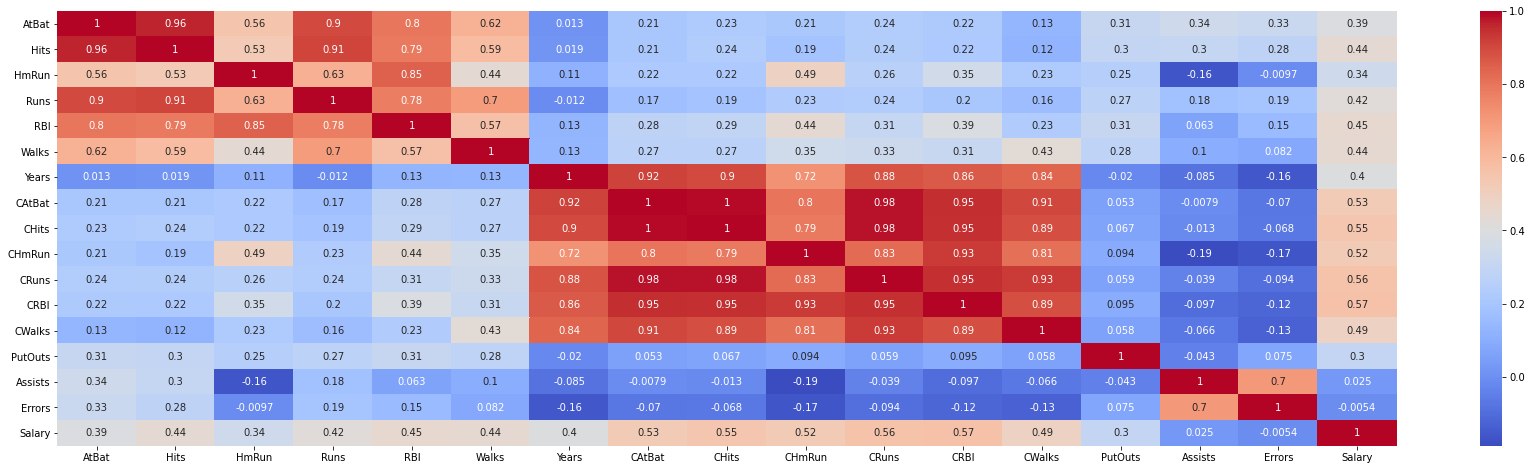

In [ ]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

We can See that there are co-related parameters in above plotting so, we can pick those features which has corelation greater than 0.4 with the 'Salary' for our model.

In [ ]:
co_relation = train.corr()
co_relation[co_relation['Salary']>0.4].index

Index(['Hits', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun',
       'CRuns', 'CRBI', 'CWalks', 'Salary'],
      dtype='object')

In [ ]:
train = train[['Hits', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun',
       'CRuns', 'CRBI', 'CWalks', 'Salary']]


test = test[['Hits', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun',
       'CRuns', 'CRBI', 'CWalks', 'Salary']]       

#### Splitting the train and test data accordingly.

In [ ]:
X_train = train.drop('Salary', axis = 1)
y_train = train['Salary']

X_test = test.drop('Salary', axis = 1)
y_test = test['Salary']

### Reshaping and Scaling

In [ ]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
x_test = sc_X.fit_transform(X_test)

### Implementing Ridge Regression

In [ ]:
# Importing the Ridge library form sklearn.learn_model
from sklearn.linear_model import Ridge

# Applying th Ridge Regression and fitting it to our training dataset values.
rdg = Ridge(alpha = 0.01)
rdg.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Ridge Score

Return the coefficient of determination R^2 of the prediction.

In [ ]:
# Calculating the Ridge Score for the training dataset.

print('Ridge Score:', rdg.score(X_train, y_train))

Ridge Score: 0.48081750269824636


In [ ]:
# Ridge prediction on our test set.

prediction = rdg.predict(x_test)

In [ ]:
# Putting the values of our prediction in the y_test. 
y_test[:,0] = prediction[:,0]

# Converting the numpy.array to a Dataframe.
y_test = pd.DataFrame({'Salary': y_test[:, 0]})
print(y_test.head())

       Salary
0  287.398184
1  221.607858
2  910.880433
3  145.329747
4  819.066327
